In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import confusion_matrix as cm

In [3]:
d=pd.read_csv(r"C:\Users\pothi\Crop_recommendation.csv")
print(d.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
print(d.tail())

        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [5]:
d.shape

(2200, 8)

In [6]:
d.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
d.duplicated().sum()  ##  d.drop_duplicates()

0

In [8]:
d.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
d.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
d.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
d['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
d['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [14]:
crop_summary = pd.pivot_table(d,index = ['label'],aggfunc = 'mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [15]:
d.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [16]:
x=d.iloc[:,:-1].values
y=d.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(d, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 1760
Rows in test set: 440



In [18]:
from sklearn import metrics,neighbors,svm
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score, accuracy_score

In [19]:
x_train, x_test, y_train, y_test= train_test_split (x, y, test_size= 0.3, random_state=0) 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics,neighbors,svm

In [21]:
Knn=neighbors.KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
k=metrics.accuracy_score(y_test,y_pred)*100
k

97.87878787878788

In [22]:
k = metrics.precision_score(y_test,y_pred,average='micro')*100
print(k)
l = metrics.recall_score(y_test,y_pred,average='micro')*100
print(l)

97.87878787878788
97.87878787878788


In [23]:
m = metrics.f1_score(y_test,y_pred,average='micro')*100
print(m)

97.87878787878788


In [24]:
SVM=svm.SVC()
SVM.fit(x_train,y_train)
Y_SVM=SVM.predict(x_test)
s=metrics.accuracy_score(y_test,Y_SVM)*100
s

97.27272727272728

In [26]:
m = metrics.f1_score(y_test,Y_SVM,average='micro')*100
print(m)
k = metrics.precision_score(y_test,Y_SVM,average='micro')*100
print(k)
l = metrics.recall_score(y_test,Y_SVM,average='micro')*100
print(l)

97.27272727272728
97.27272727272728
97.27272727272728


In [27]:
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [28]:
Classifier.fit(x_train,y_train)
y_dpred=Classifier.predict(x_test)
dt=metrics.accuracy_score(y_test,y_dpred)*100
dt

98.03030303030303

In [29]:
m = metrics.f1_score(y_test,y_dpred,average='micro')*100
print(m)
k = metrics.precision_score(y_test,y_dpred,average='micro')*100
print(k)
l = metrics.recall_score(y_test,y_dpred,average='micro')*100
print(l)

98.03030303030303
98.03030303030303
98.03030303030303


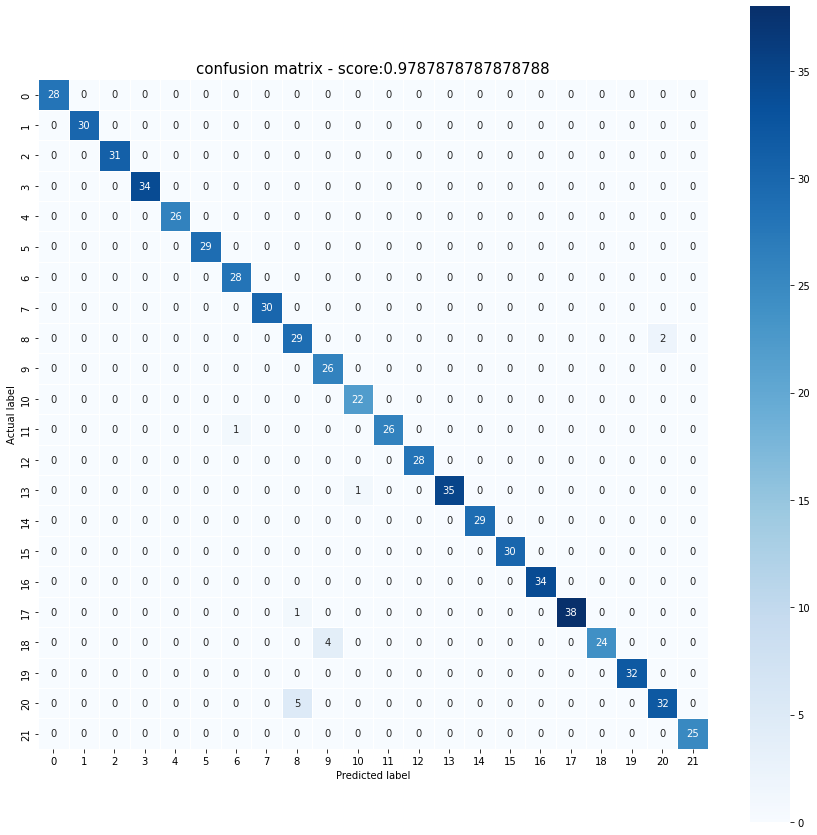

In [30]:

from sklearn.metrics import confusion_matrix as cm
y_pred=Knn.predict(x_test)
cm=cm(y_test,y_pred)

plt.figure(figsize = (15,15))
sns.heatmap(cm, annot = True, fmt ='.0f', linewidths =.5, square =True, cmap ='Blues');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
all_sample_title ='confusion matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size =15);
plt.show()

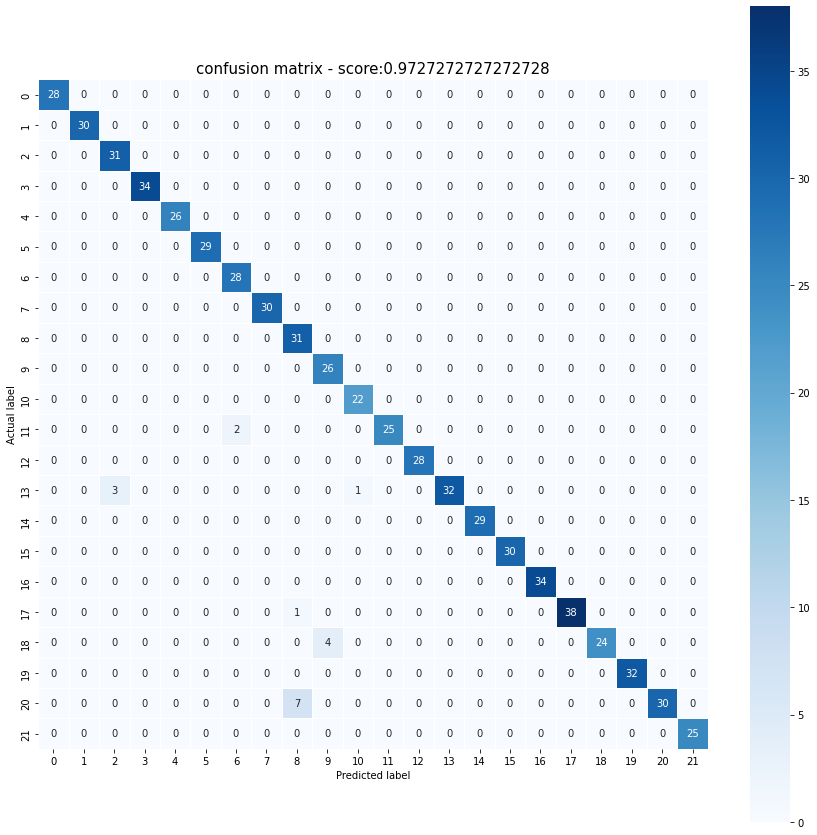

In [31]:
from sklearn.metrics import confusion_matrix as cm
Y_SVM=SVM.predict(x_test)
cm=cm(y_test,Y_SVM)

plt.figure(figsize = (15,15))
sns.heatmap(cm, annot = True, fmt ='.0f', linewidths =.5, square =True, cmap ='Blues');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
all_sample_title ='confusion matrix - score:'+str(accuracy_score(y_test,Y_SVM))
plt.title(all_sample_title,size =15);
plt.show()

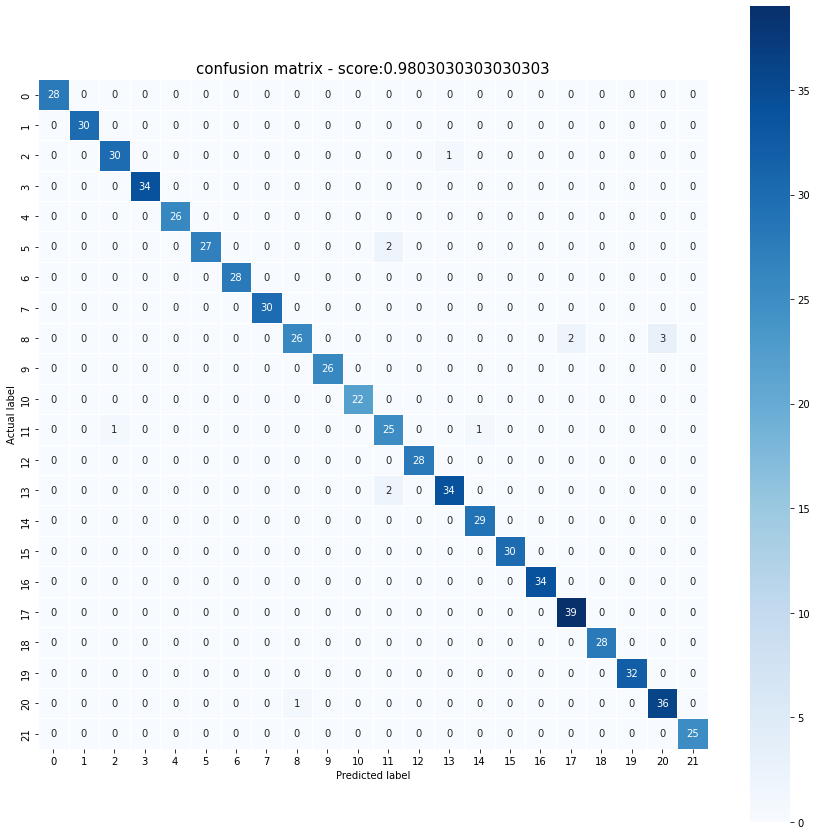

In [32]:
from sklearn.metrics import confusion_matrix as cm
y_dpred=Classifier.predict(x_test)
cm=cm(y_test,y_dpred)

plt.figure(figsize = (15,15))
sns.heatmap(cm, annot = True, fmt ='.0f', linewidths =.5, square =True, cmap ='Blues');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
all_sample_title ='confusion matrix - score:'+str(accuracy_score(y_test,y_dpred))
plt.title(all_sample_title,size =15);
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_dpred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.84      0.90        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.86      0.93      0.89        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      0.94      0.96        36
    mungbean       0.97      1.00      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       0.95    

In [ ]:
#x_test[2:3]

In [ ]:
N = int(input("Enter the Value of N:"))
P = int(input("Enter the Value of P:"))
K = int(input("Enter the Value of K:"))
temperature = float(input("Enter the level of Temperature:"))
humidity = float(input("Enter the level of Humidity:"))
ph = float(input("Enter the value for ph:"))
rainfall = float(input("Enter the level of rainfall:"))
jj = Classifier.predict([[N,P,K,temperature,humidity,ph,rainfall]])
print("The Suitable Crop for the given conditions :",jj[0])

In [ ]:
x=['KNN','SVM','Decission Tree']
y=[k,s,dt]
plt.bar(x,y,width=0.7,color='green')
plt.xlabel("ML Model")
plt.ylabel("Accuracy")